In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

plt.rcParams["image.cmap"] = 'gray'

# The dataset

This TensorFlow dataset is made up of 28 x 28 grayscale images into 10 classes (from 0 to 9) with pixel values between 0 and 255.

*Fashion MNIST datset* is made up of 60_000 training images and 10_000 test images.

This dataset has all the images in the same shape, so we have little preprocessing to do.

In [2]:
# Import the fashion_mnist dataset from TensorFlow
# Create the training and testing dataset using the load_data() method
fashion_data = keras.datasets.fashion_mnist

# Create numpy array of training and testing data
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

In [3]:
# Training data
print(f"The size of train images are: {train_images.shape}")
print(f"The size of the train labels are: {train_labels.shape}")

print()
# Testing data
print(f"The size of testing images are: {test_images.shape}")
print(f"The size of testing labels are: {test_labels.shape}")

The size of train images are: (60000, 28, 28)
The size of the train labels are: (60000,)

The size of testing images are: (10000, 28, 28)
The size of testing labels are: (10000,)


Rather than using numeric labels, let us create labels that match our data such that we can call a dress a dress, rather than call it number 3.
We will do that by creating a list of our labels, which we will map to the corresponding numeric values:

In [4]:
print(train_labels[0])
print(train_labels[45])

9
2


In [5]:
# We create a list of the categories
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]

Now we have the data, let us explore the data and see what we can find. Let's explore the data to verify the size, the shape, and the data distributions.

## Performing exploratory data analysis
After we load the data, the next step is to examine it to get a sense of what the data is. let us confirm all the details using code.

1. We will use the **matplotlib** library to generate image samples at index *i* , where *i* falls within the 60_000 training samples:

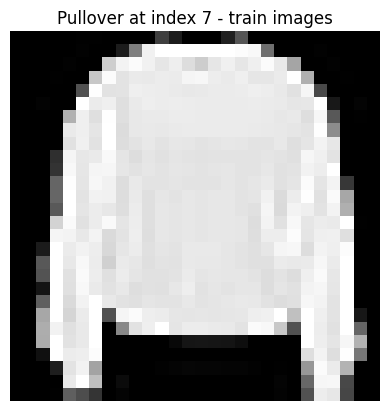

In [6]:
# Display a sample image from the training data (index 7)
plt.imshow(train_images[7])
plt.title("Pullover at index 7 - train images")
plt.grid(False)
plt.axis('off')
plt.show()

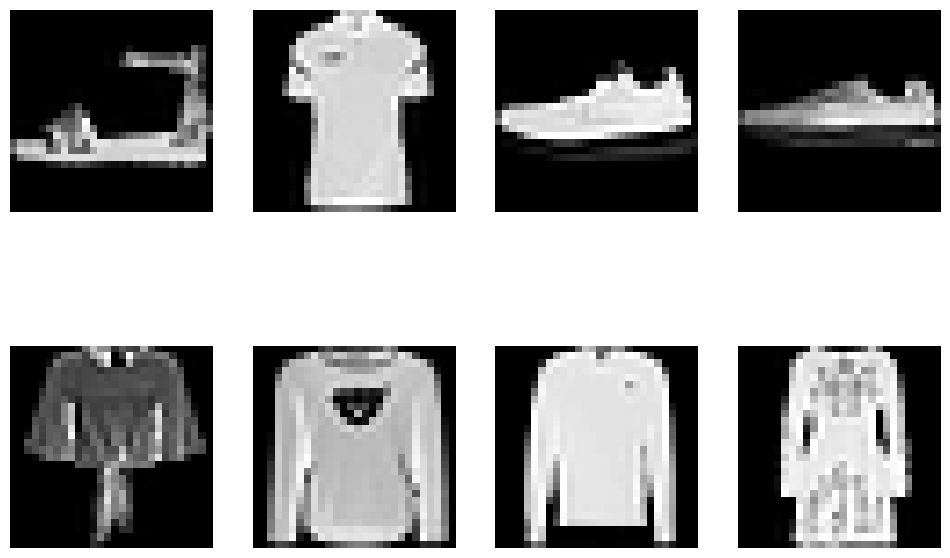

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
for row in range(0, 2):
    for column in range(0, 4):
        axes[row, column].imshow(train_images[random.randint(1, 1000)])
        axes[row, column].grid(False)
        axes[row, column].axis('off')

In [8]:
# Check the shape of our training images and testing images
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

## Check the distribution of the data

It's best practice to see how your data is distributed to ensure there is enough representation for each class of clothing we want to train the model on.

In [9]:
df = pd.DataFrame(np.unique(train_labels, return_counts=True)).T
dict = {0: "Label", 1: "Count"}
df.rename(columns=dict, inplace=True)

In [10]:
# All the labels have the same number of samples
df

,Label,Count
0,0,6000
1,1,6000
2,2,6000
3,3,6000
4,4,6000
5,5,6000
6,6,6000
7,7,6000
8,8,6000
9,9,6000


The data is made up of grayscale images with values from 0 to 255. To bring the data to scale, we will have to normalize the data to improve the performance of the model during training.

We can do this by simply dividing the training and testing data by 255.

In [11]:
train_images[0][14]

array([  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
       226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
        77,   0], dtype=uint8)

In [12]:
# It's important that the training and testing set are preprocessed in the same way
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
train_images[0][14]

array([0.        , 0.        , 0.00392157, 0.01568627, 0.02352941,
       0.02745098, 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.92941176, 0.88627451, 0.85098039,
       0.8745098 , 0.87058824, 0.85882353, 0.87058824, 0.86666667,
       0.84705882, 0.8745098 , 0.89803922, 0.84313725, 0.85490196,
       1.        , 0.30196078, 0.        ])

# Building the model

Now that we have normalized our data, we are all set for modeling it.

The first layer is a flatten layer. This layer is used to flatten the image data into a 1D array that will be passed into the hidden layer.

The input layer has no neurons; it works as a data preprocessing layer, presenting the hidden layer with data flattened into a 1D array

In [14]:
# Step 1: Model configuration | building the model
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax")
    ]
)

c:\Users\Usuario iTC\Desktop\Fashion-MNIST\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the model

The next step is to compile the model. We will use the *compile* method to do so. Here, we pass in the optimizer we wish to use; in this case, we apply **Adam**, which is our default optimizer. We also specify the loss and the evaluation metrics.

We use **sparse categoriacl-cross entropy** for our loss since our labels are numeric values.

For our evaluation metrics, we use **accuracy**, since our dataset is balanced.
The accuracy metric will give a true reflection of our model's performance:

In [19]:
# Step 2: Compiling the model, we add the loss, optimizer and evaluation metrics here
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Model visualization

To visualize our model, we use the *summary()* method. This provides us with a detailed visual representation of the model's architecture, the layers, the number of parameters (trainable and non-trainable), and the output shape

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

# Model fitting

We can see that in just five epochs, our model has achieved an accuracy of 0.8863. This  is a good start considering we trained our model for a very small number of epochs. Next, let us observe our model's performance during training by plotting the loss and accuracy plots.

In [20]:
# Step 3: We fit our data to the model
# fit the training images (X) and training labels (y)
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7734 - loss: 0.6658
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8619 - loss: 0.3959
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8736 - loss: 0.3551
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8813 - loss: 0.3274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8863 - loss: 0.3095


### Training monitoring

We return a *history* object when we fit our training data. Here, we use the *history* object to create a loss and accuracy curve. Here is the code to make the plots:

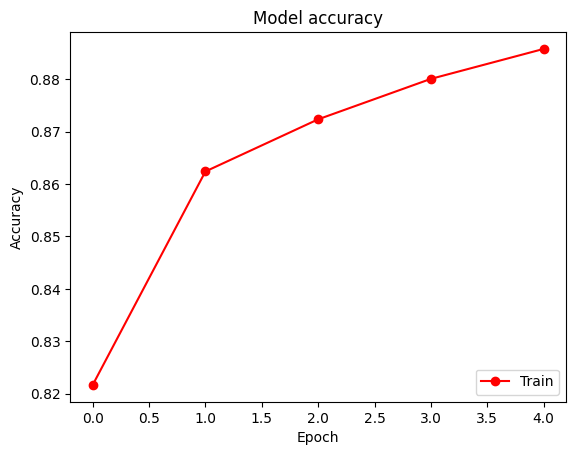

In [28]:
# plot history for accuracy
plt.plot(history.history["accuracy"], marker="o", color='red')
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train'], loc='lower right')
plt.show()

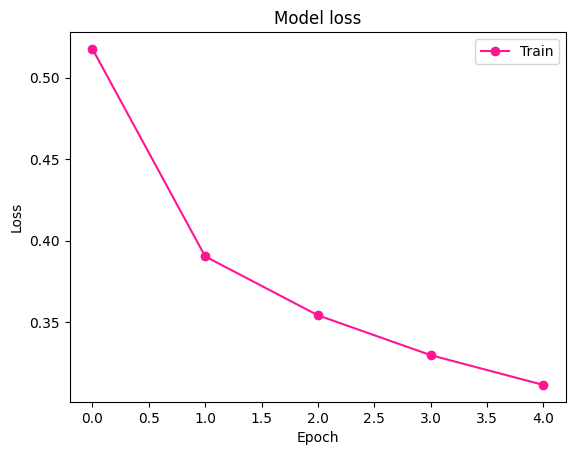

In [27]:
# Plot for loss
plt.plot(history.history["loss"], marker="o", color="deeppink")
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train"], loc='upper right')
plt.show()

## Evaluating the model

We evaluate the overall performance of our model on the test set as follows.

We get an accuracy of 0.8679 on the test set. The difference between the training accuracy and the test accuracy is a common problem in machine learning that we refer to as **overfitting**.

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8683 - loss: 0.3720
Test accuracy: 0.867900013923645
Test loss: 0.37554681301116943


## Model prediction

To make predictions on the model, we use the *model.predict()* method on unseen data from our test set.

In [30]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
print(type(predictions))
print(predictions.ndim)
print(predictions.shape)

<class 'numpy.ndarray'>
2
(10000, 10)


In [34]:
predictions[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.03, 0.  , 0.94],
      dtype=float32)

In [37]:
# use np.argamx to extract the label and compare it to the test label at index 0
np.argmax(predictions[0].round(2)), test_labels[0]

(9, 9)

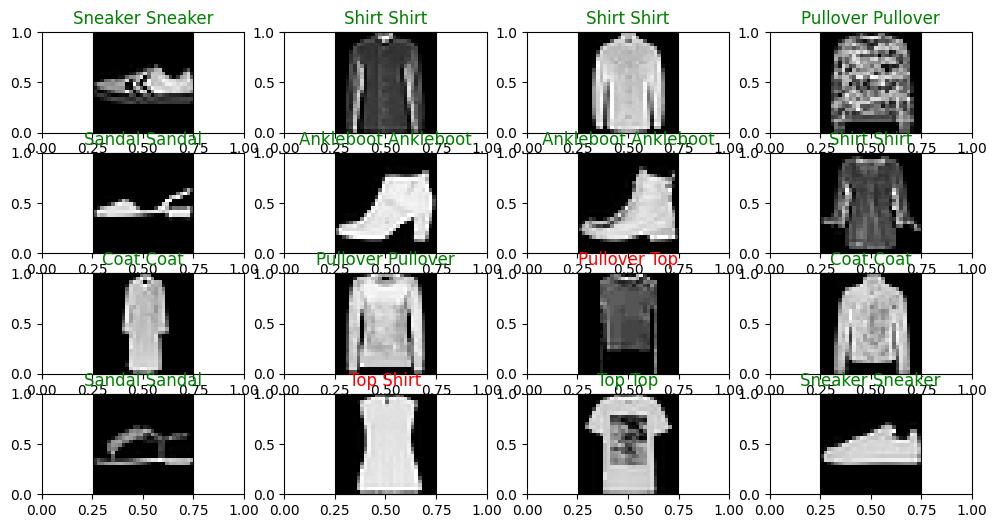

In [54]:
figure, axes = plt.subplots(4, 4, figsize=(12, 6))

for i, index in enumerate(np.random.choice(test_images.shape[0], size=16, replace=False)):
    ax = figure.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(predictions[index])
    true_index = np.argmax(predictions[index])
    true_index = test_labels[index]
    # set the title for each class
    ax.set_title(f"{class_names[predict_index]} {class_names[true_index]}", color=("green" if predict_index == true_index else "red"))
